In [1]:
# Install Python 3.9.13 https://www.python.org/downloads/macos/
!python --version

Python 3.9.13


In [2]:
# RUN THIS ONCE - then comment

!pip install tigramite
!pip install numpy==1.21.5
!pip install matplotlib==3.5.2
!pip install pandas==1.4.4
!pip install scikit-learn==1.0.2
!pip install dcor==0.6
!pip install torch==2.0.1

In [3]:
# Imports
import numpy as np
from numpy import genfromtxt
import matplotlib 
from matplotlib import pyplot as plt
import pandas as pd
import os
%matplotlib inline     

import sklearn
import dcor
import torch
import subprocess

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI
import tigramite.independence_tests 

from tigramite.toymodels import structural_causal_processes as toys

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [4]:
print("numpy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)
print("pandas version:", pd.__version__)
print("scikit-learn version:", sklearn.__version__)
print("dcor version:", dcor.__version__)
print("torch version:", torch.__version__)
print("tigramite version:", "5.2.1.8")

numpy version: 1.21.5
matplotlib version: 3.5.2
pandas version: 1.4.4
scikit-learn version: 1.0.2
dcor version: 0.6
torch version: 2.0.1
tigramite version: 5.2.1.8


In [5]:
data_aug = genfromtxt('hogg-aug.csv', delimiter=',')

In [6]:
data_aug.shape

(1489, 12)

In [7]:
data_aug = np.delete(data_aug, (0), axis=1)

In [8]:
data_aug[np.isnan(data_aug)] = 999

In [9]:
data_aug.shape

(1489, 11)

In [10]:
from tigramite.independence_tests.parcorr_mult import ParCorrMult

parcorr = ParCorrMult()

var_names = ['GPP_f', 'Reco', 'SWIN_1_1_1', 'VPD.x', 'air_p_mean', 'TS_2_1_1',"WTD",'LE_f', 'FCH4',"TDP_interp","SO4_interp"]

df_aug = pp.DataFrame(data_aug, var_names=var_names, missing_flag = 999)

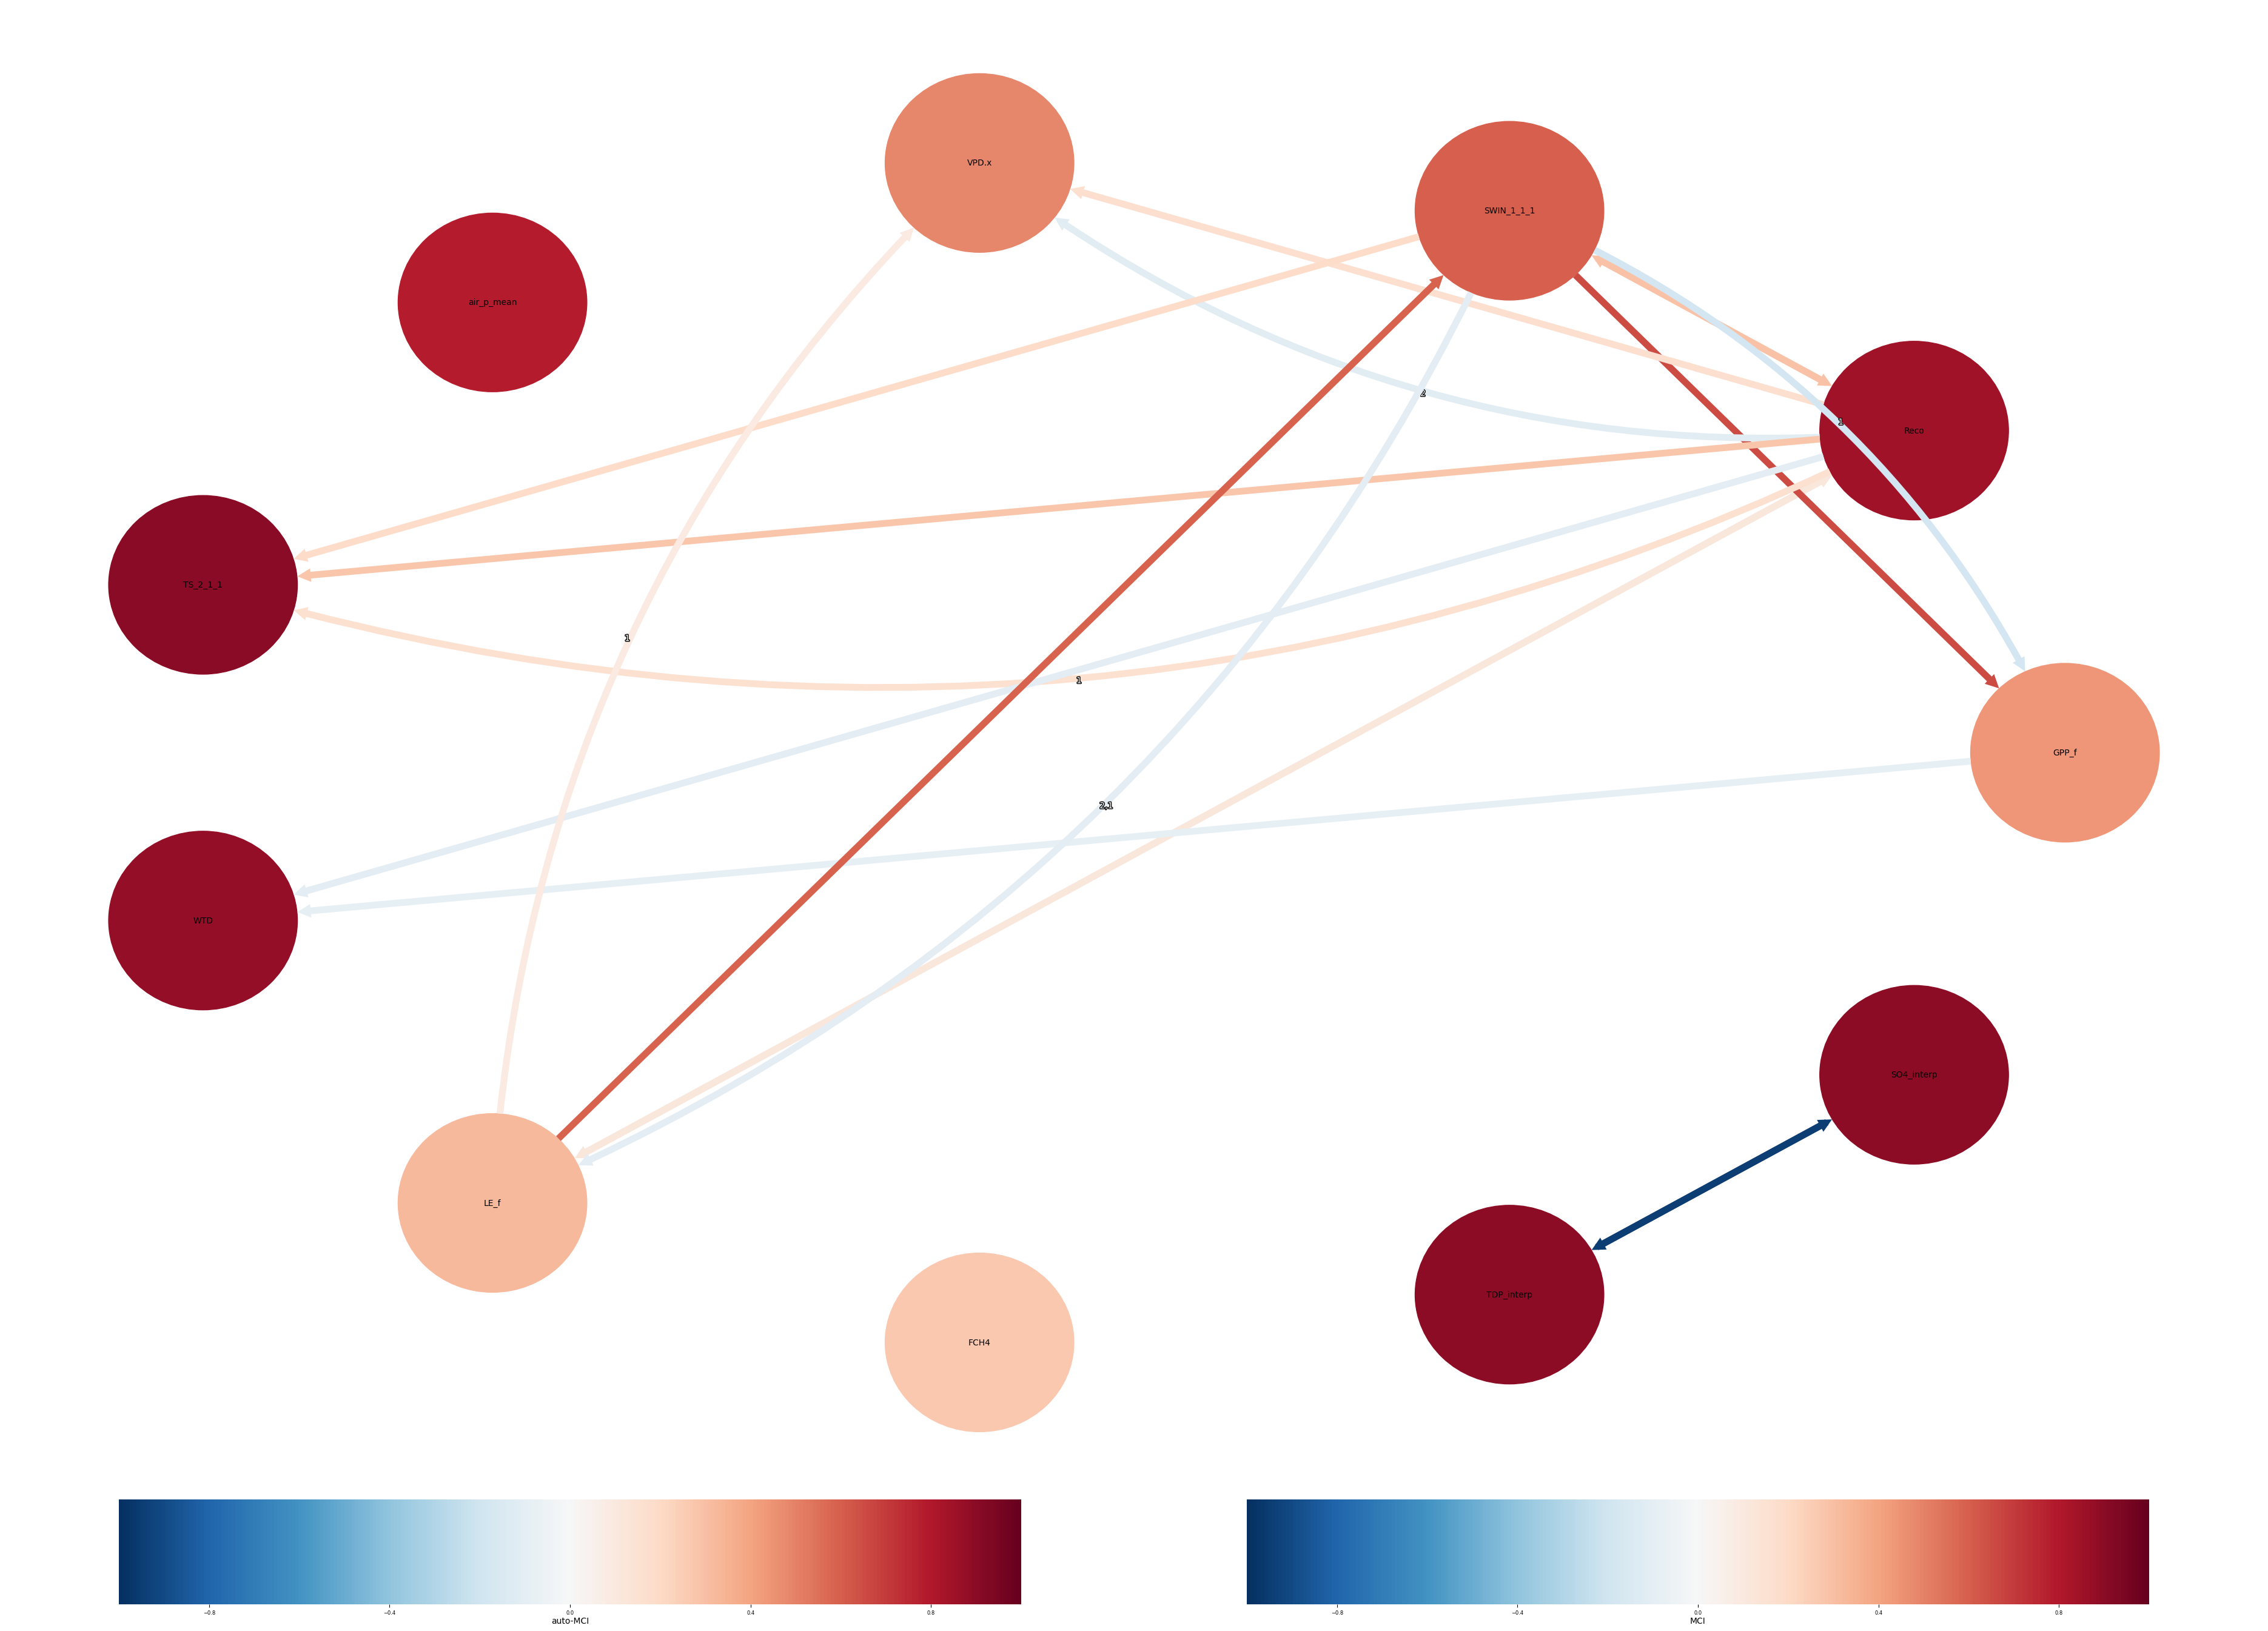

CPU times: user 2min 59s, sys: 43.8 s, total: 3min 43s
Wall time: 39.9 s


In [11]:
%%time

# Model - Aug

lpcmci_aug = LPCMCI(dataframe=df_aug, 
                cond_ind_test=parcorr,
                verbosity=0)

# Define the analysis parameters.
tau_max = 8
pc_alpha = 0.001

# Run LPCMCI
result = lpcmci_aug.run_lpcmci(tau_max=tau_max,
                            pc_alpha=pc_alpha)

tp.plot_graph(
    figsize=(48, 32),
    val_matrix=result['val_matrix'],
    graph=result['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()

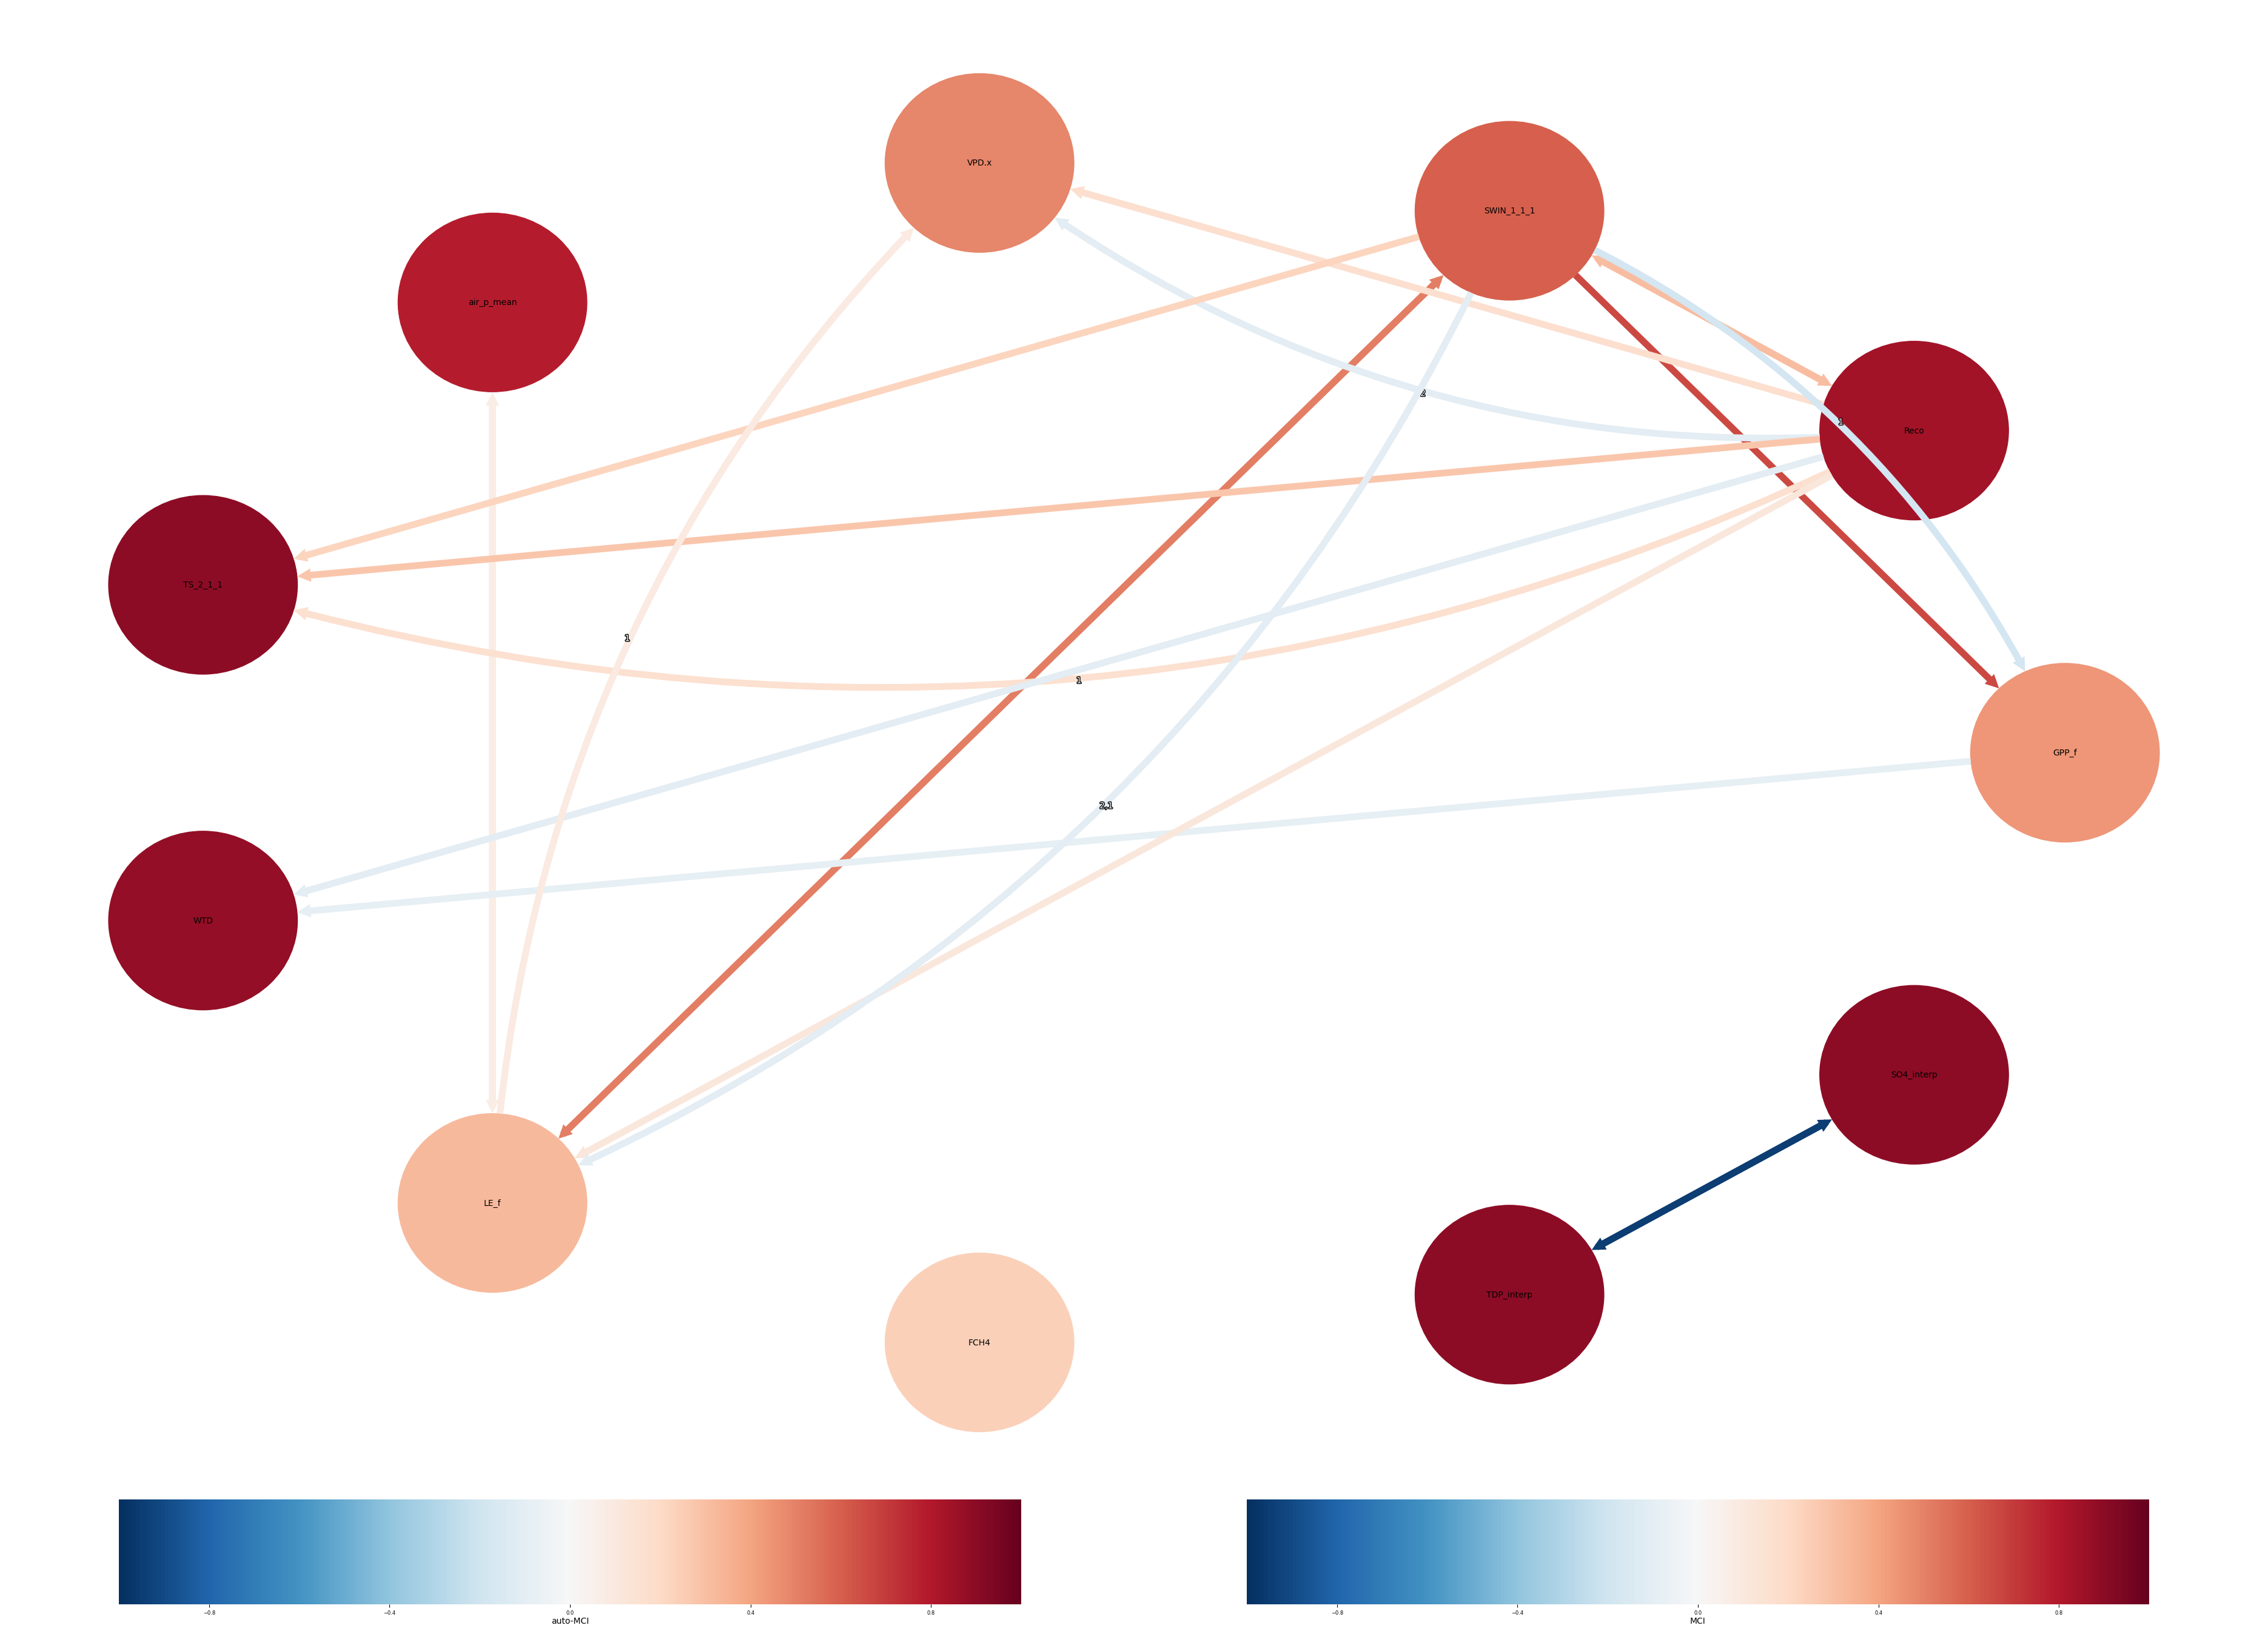

CPU times: user 2min, sys: 26.3 s, total: 2min 26s
Wall time: 36.7 s


In [12]:
%%time

# Model - Aug

lpcmci_aug = LPCMCI(dataframe=df_aug, 
                cond_ind_test=parcorr,
                verbosity=0)

# Define the analysis parameters.
tau_max = 8
pc_alpha = 0.005

# Run LPCMCI
result = lpcmci_aug.run_lpcmci(tau_max=tau_max,
                            pc_alpha=pc_alpha)

tp.plot_graph(
    figsize=(48, 32),
    val_matrix=result['val_matrix'],
    graph=result['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()

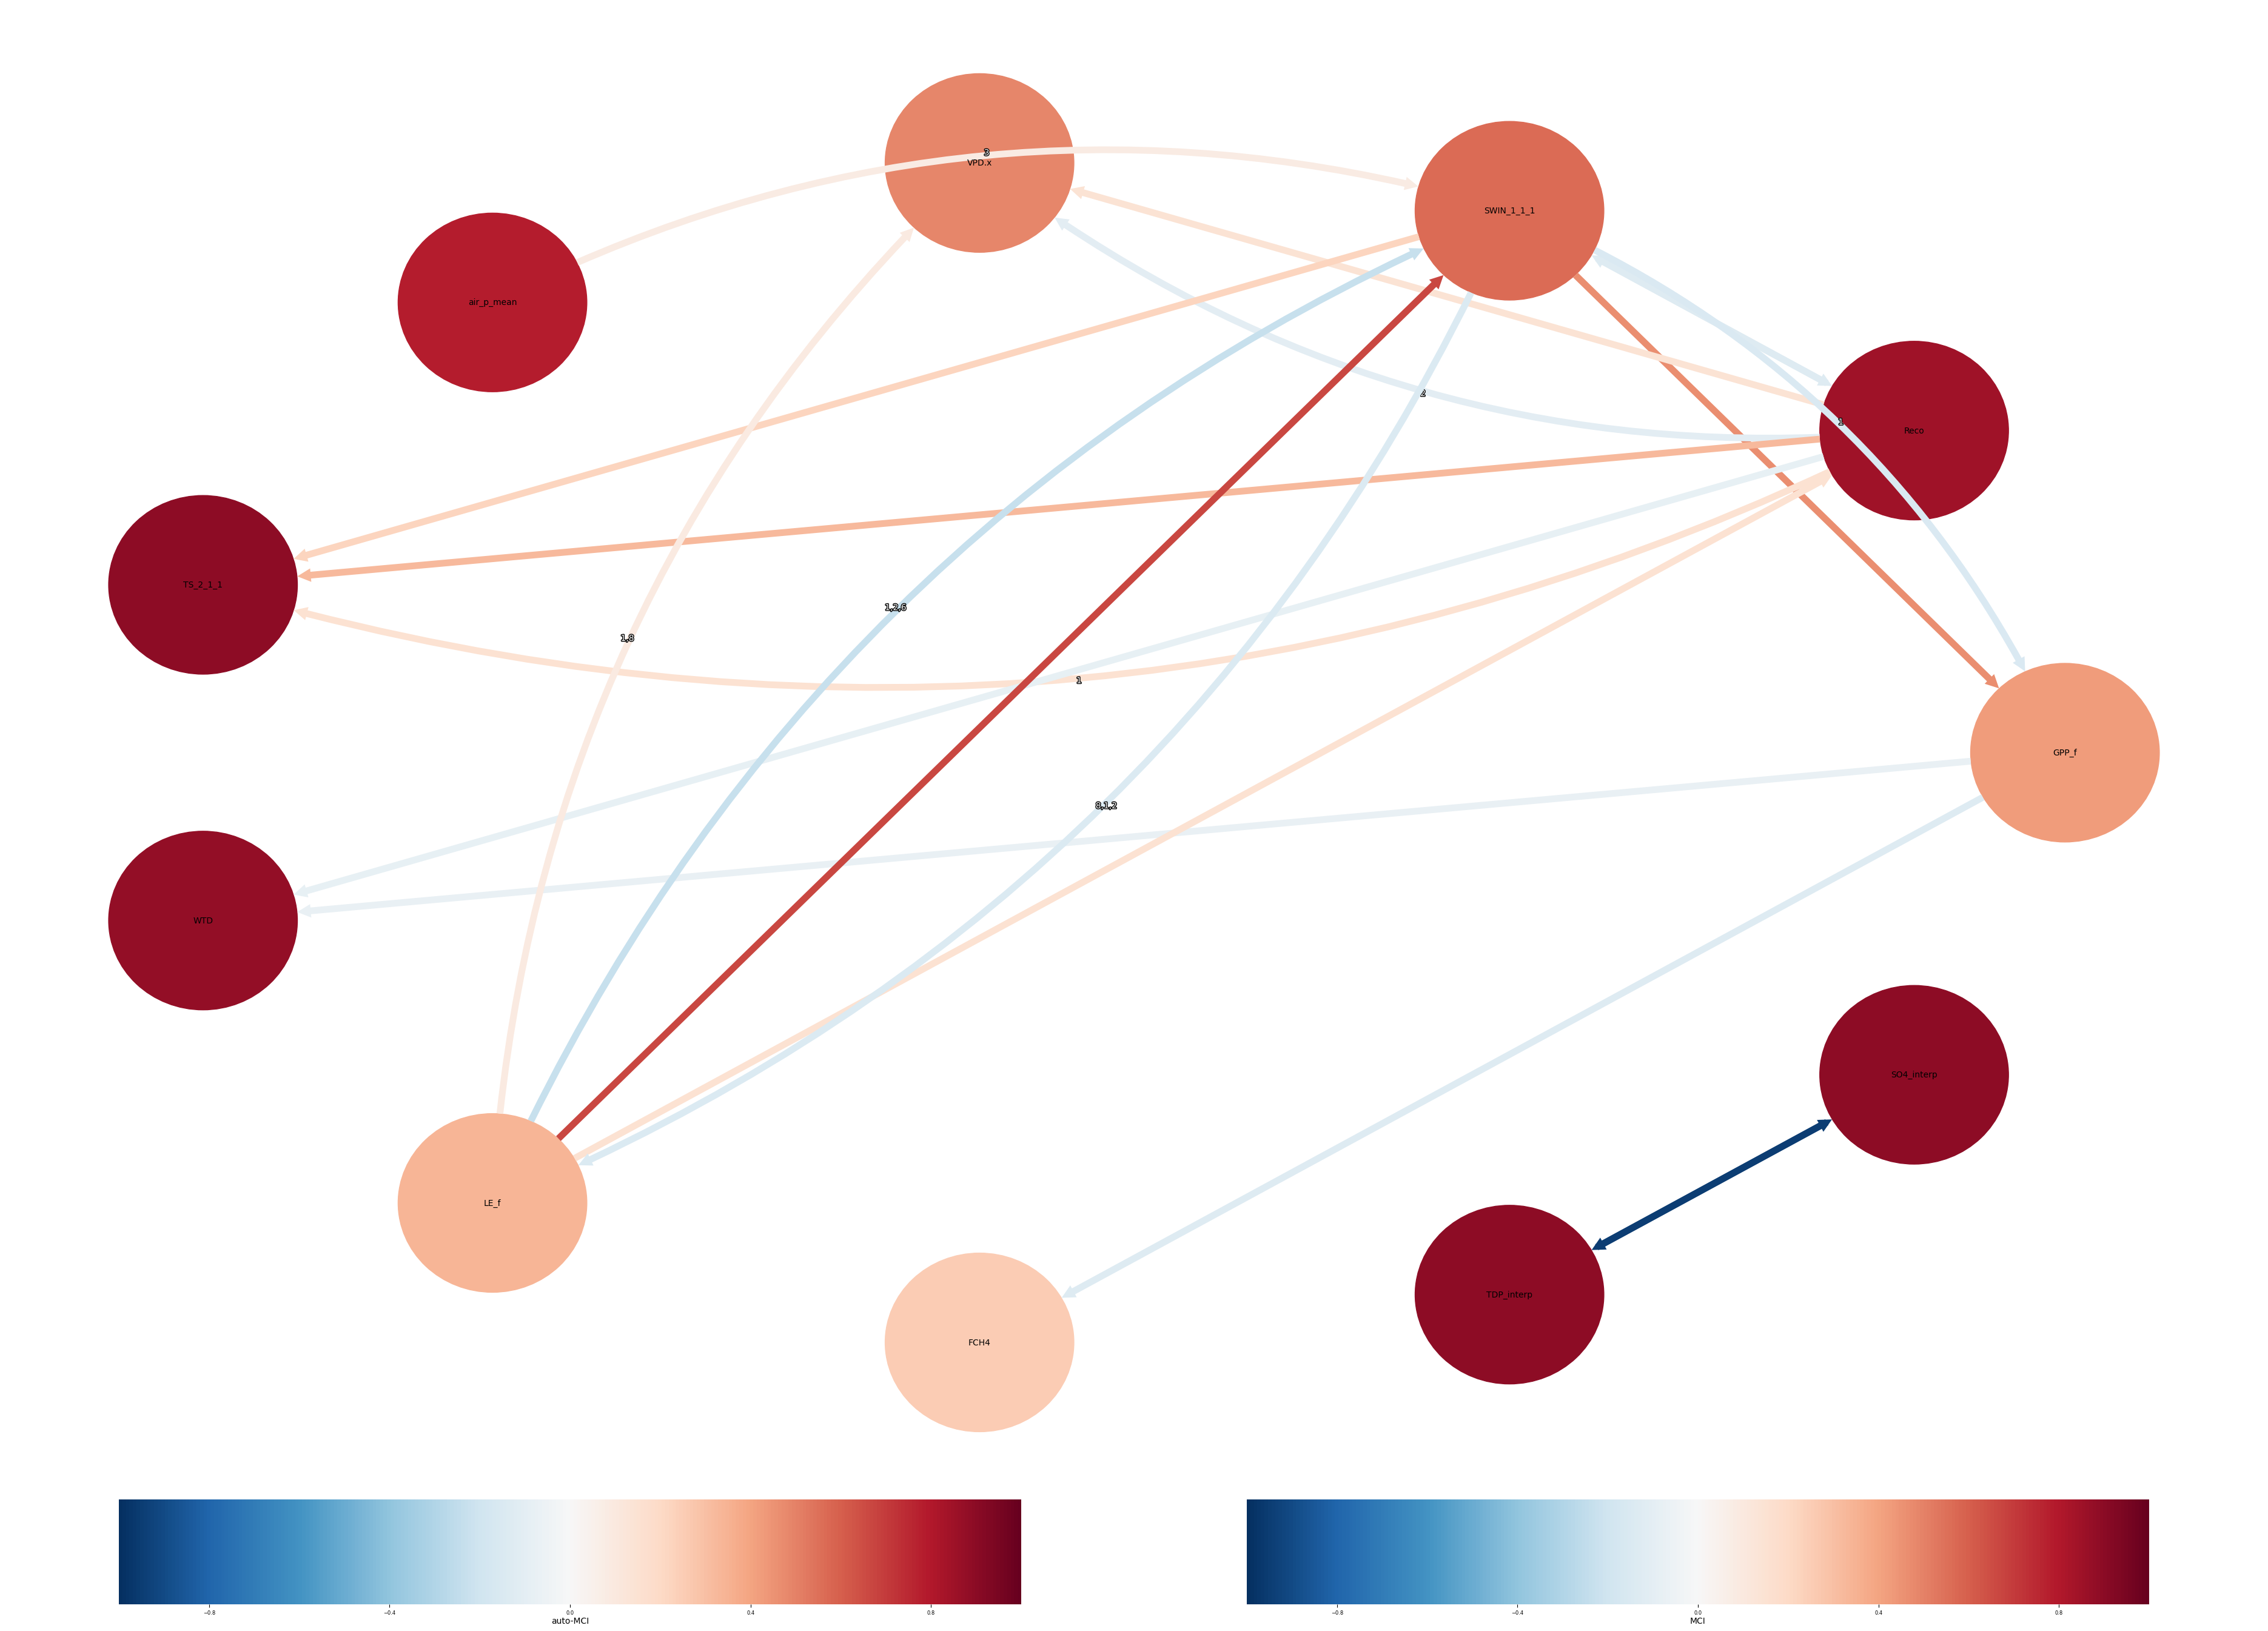

CPU times: user 2min 49s, sys: 36.3 s, total: 3min 26s
Wall time: 1min 9s


In [13]:
%%time

# Model - Aug

lpcmci_aug = LPCMCI(dataframe=df_aug, 
                cond_ind_test=parcorr,
                verbosity=0)

# Define the analysis parameters.
tau_max = 8
pc_alpha = 0.01

# Run LPCMCI
result = lpcmci_aug.run_lpcmci(tau_max=tau_max,
                            pc_alpha=pc_alpha)

tp.plot_graph(
    figsize=(48, 32),
    val_matrix=result['val_matrix'],
    graph=result['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()

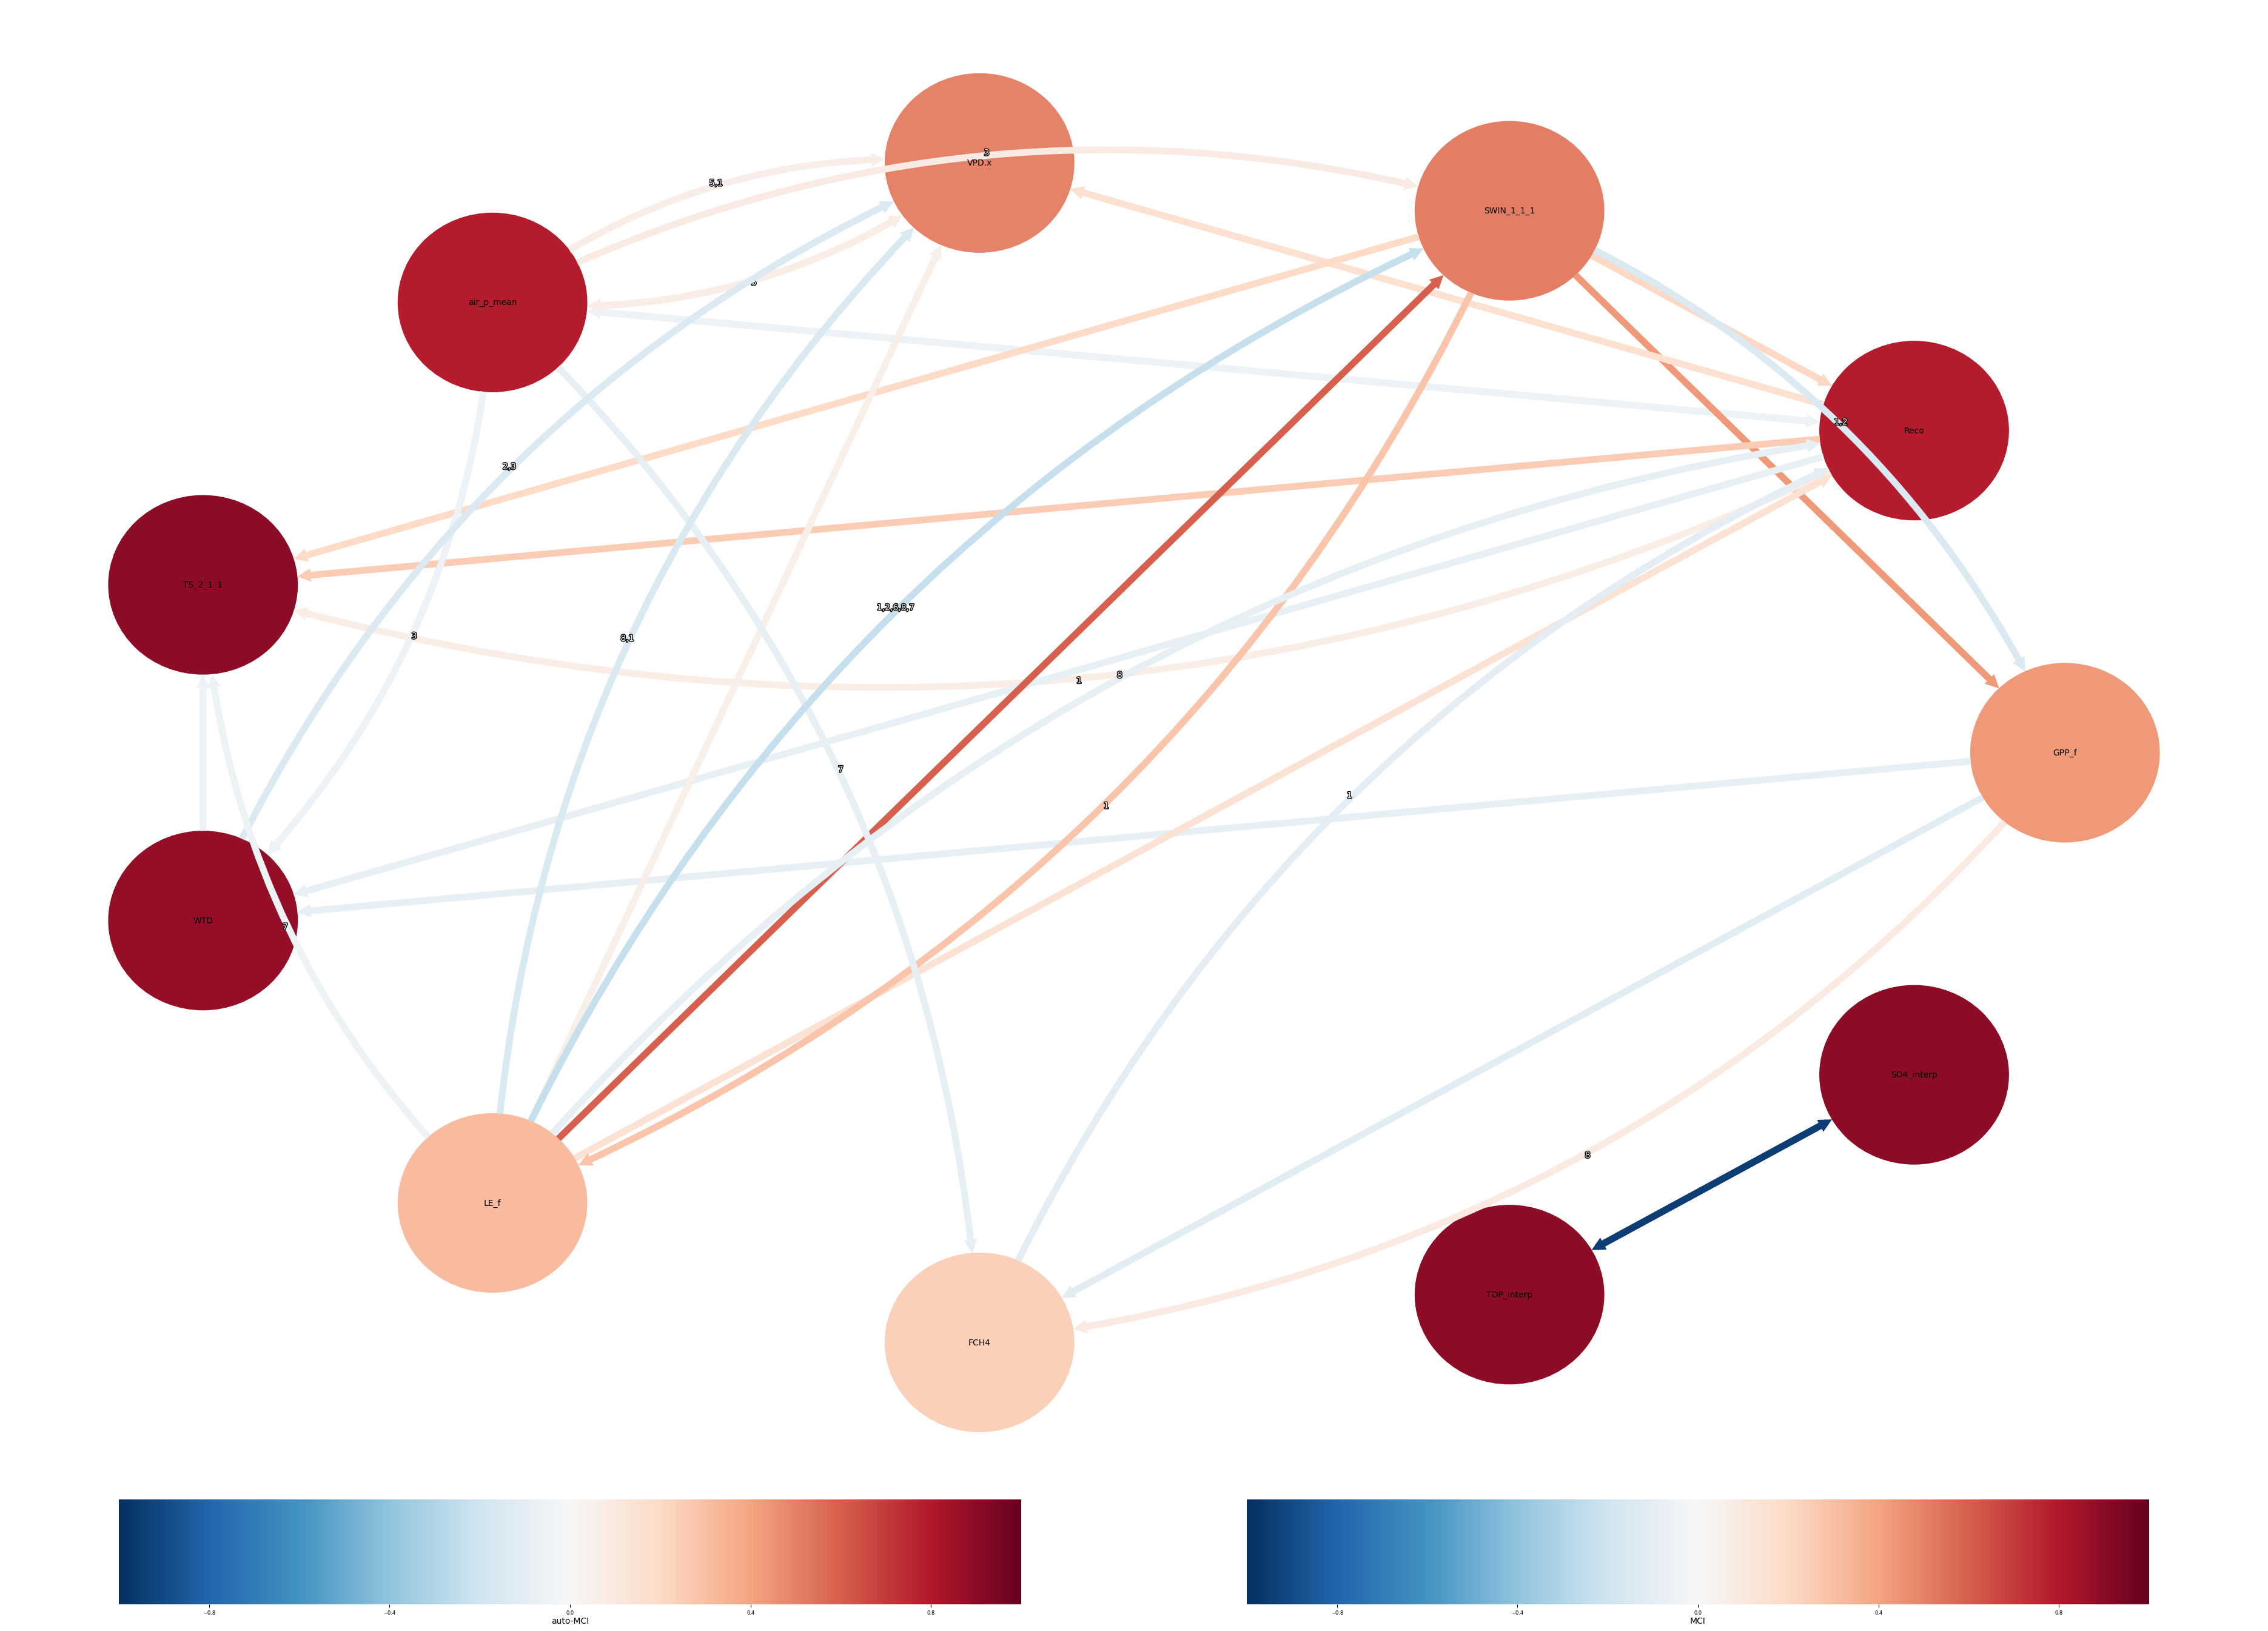

CPU times: user 5min 7s, sys: 44.9 s, total: 5min 52s
Wall time: 2min 42s


In [14]:
%%time

# Model - Aug

lpcmci_aug = LPCMCI(dataframe=df_aug, 
                cond_ind_test=parcorr,
                verbosity=0)

# Define the analysis parameters.
tau_max = 8
pc_alpha = 0.05

# Run LPCMCI
result = lpcmci_aug.run_lpcmci(tau_max=tau_max,
                            pc_alpha=pc_alpha)

tp.plot_graph(
    figsize=(48, 32),
    val_matrix=result['val_matrix'],
    graph=result['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()